In [2]:
# Essentials
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gudiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gudiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gudiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gudiv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
data = pd.read_csv(r'C:\pawan chinnu data science\proj1\all-data.csv', encoding='ISO-8859-1')

In [5]:

data.columns = ['Sentiment', 'text']
data.head()

,Sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


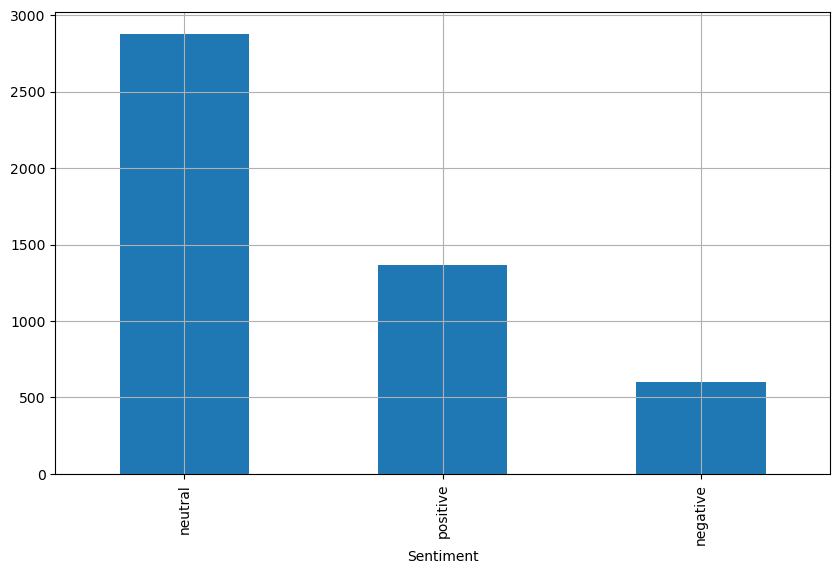

In [6]:
data['Sentiment'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()

In [7]:
data['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

# PreProcessing

In [8]:
# Define preprocessing variables
stop_words = set(stopwords.words('english'))
lzr = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemer = SnowballStemmer('english')

In [9]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)
    
    # tokenize the words using nltk word tokenizer and remove the stop words using nltk package's english stop words
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [10]:
# ...existing code...
data_copy = data.copy()
data_copy['text'] = data_copy['text'].apply(lambda text: text_processing(text))
# ...existing

In [11]:

le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])
#1-Neutral, 2-Positive, 0-Negative


In [12]:
processed_data = {
    'Sentence':data_copy.text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,technopolis plan develop stage area le 100000 ...,1
1,international electronic industry company elco...,0
2,new production plant company would increase ca...,2
3,according company updated strategy year 200920...,2
4,financing aspocomp growth aspocomp aggressivel...,2


In [13]:
processed_data['Sentiment'].value_counts()

Sentiment
1    2878
2    1363
0     604
Name: count, dtype: int64

In [14]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 3130, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 3130, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

In [15]:
final_data['Sentiment'].value_counts()

Sentiment
0    3130
2    3130
1    2878
Name: count, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into X and y
X = final_data['Sentence']
y = final_data['Sentiment']

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()
y= final_data.iloc[:, -1].values

In [17]:

from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.naive_bayes import MultinomialNB

# Transform the training and test data using the fitted TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Fit the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Import evaluation metrics

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8111

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.96      0.87       943
     Neutral       0.80      0.76      0.78       866
    Positive       0.85      0.71      0.77       933

    accuracy                           0.81      2742
   macro avg       0.81      0.81      0.81      2742
weighted avg       0.81      0.81      0.81      2742


Confusion Matrix:
[[908  27   8]
 [ 98 656 112]
 [132 141 660]]


In [21]:
# Calculate training accuracy
y_train_pred = classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate testing accuracy (already computed as 'accuracy')
print(f"Testing Accuracy: {accuracy:.4f}")

Training Accuracy: 0.8809
Testing Accuracy: 0.8111


In [22]:
def predict_sentiment(text):
    # Preprocess the input text using the same pipeline
    processed_text = text_processing(text)
    # Transform using the fitted TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([processed_text]).toarray()
    # Predict using the trained classifier
    pred = classifier.predict(text_tfidf)[0]
    # Decode the label to original sentiment
    sentiment_label = le.inverse_transform([pred])[0]
    return sentiment_label
# Example usage:
result = predict_sentiment("The new plant is planned to have an electricity generation capacity of up to 350 megawatts ( MW ) and the same heat generation capacity .")
print("Predicted Sentiment:", result)

Predicted Sentiment: neutral


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on TF-IDF features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.9322

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.99      0.98       943
     Neutral       0.91      0.89      0.90       866
    Positive       0.92      0.91      0.92       933

    accuracy                           0.93      2742
   macro avg       0.93      0.93      0.93      2742
weighted avg       0.93      0.93      0.93      2742


Confusion Matrix:
[[934   6   3]
 [ 24 774  68]
 [ 13  72 848]]


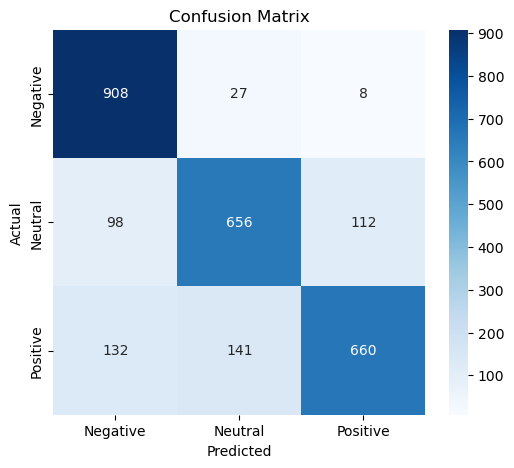

In [24]:
# Plot confusion matrix as an image
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

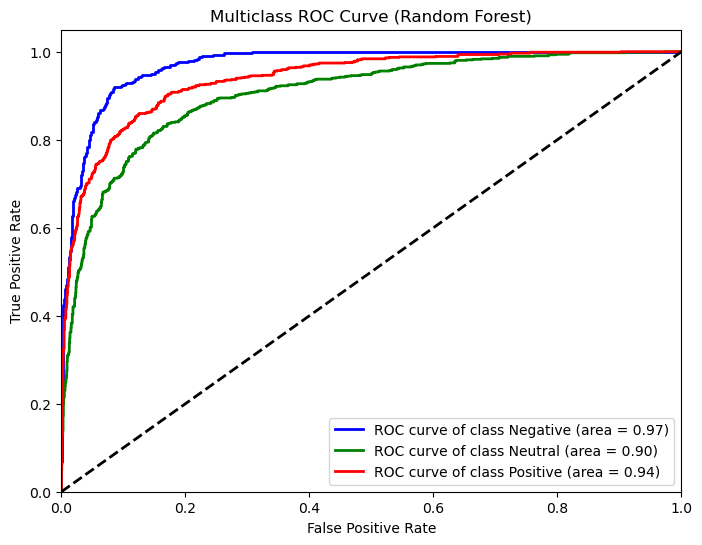

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get probability estimates for each class
y_score = classifier.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Negative', 'Neutral', 'Positive']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [26]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer

In [27]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [28]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(final_data['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10085 unique tokens.


<>:1: SyntaxWarning: invalid escape sequence '\]'
<>:1: SyntaxWarning: invalid escape sequence '\]'
C:\Users\gudiv\AppData\Local\Temp\ipykernel_7904\1902181627.py:1: SyntaxWarning: invalid escape sequence '\]'
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)


In [29]:
X_final = tokenizer.texts_to_sequences(final_data['Sentence'].values)
X_final = pad_sequences(X_final, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_final.shape)

Shape of data tensor: (9138, 250)


In [30]:
Y_final = pd.get_dummies(final_data['Sentiment']).values
print('Shape of label tensor:', Y_final.shape)

Shape of label tensor: (9138, 3)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size = 0.3, random_state = 42, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6396, 250) (6396, 3)
(2742, 250) (2742, 3)


In [32]:
rnn_model = Sequential()
rnn_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_final.shape[1]))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(3, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

rnn_history = rnn_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

c:\Users\gudiv\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.3829 - loss: 1.1141 - val_accuracy: 0.6133 - val_loss: 1.0259
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.4670 - loss: 1.0304 - val_accuracy: 0.6539 - val_loss: 1.0096
Epoch 3/5
 4/80 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.5498 - loss: 0.9457

KeyboardInterrupt: 

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_final.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 3
batch_size = 64

lstm_history = lstm_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 681ms/step - accuracy: 0.5376 - loss: 0.9207 - val_accuracy: 0.7078 - val_loss: 0.6705
Epoch 2/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 489ms/step - accuracy: 0.8439 - loss: 0.4202 - val_accuracy: 0.8461 - val_loss: 0.3933
Epoch 3/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 682ms/step - accuracy: 0.9420 - loss: 0.1755 - val_accuracy: 0.8703 - val_loss: 0.3618


In [ ]:
# Training accuracy from last epoch
train_acc = lstm_history.history['accuracy'][-1]
print(f"Training Accuracy: {train_acc:.4f}")


Training Accuracy: 0.9420


In [ ]:
# Evaluate on test data
test_loss, test_acc = lstm_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8691 - loss: 0.3524
Test Accuracy: 0.8691
